In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

pokemon_dataset = pd.read_csv("pokemon.csv")
pokemon_dataset.head(10)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0
5,"['Blaze', 'Solar Power']",0.25,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,0.25,0.0,1.0,1.0,1.0,1.0,4.0,0.5,2.0,104,5120,70,634,45,Flame Pokémon,78,1059860,1.7,78,Lizardonリザードン,Charizard,88.1,6,159,115,100,fire,flying,90.5,1,0
6,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,48,5120,70,314,45,Tiny Turtle Pokémon,65,1059860,0.5,44,Zenigameゼニガメ,Squirtle,88.1,7,50,64,43,water,NaN,9.0,1,0
7,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,63,5120,70,405,45,Turtle Pokémon,80,1059860,1.0,59,Kameilカメール,Wartortle,88.1,8,65,80,58,water,NaN,22.5,1,0
8,"['Torrent', 'Rain Dish']",1.00,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,2.00,1.0,0.5,1.0,1.0,1.0,1.0,0.5,0.5,103,5120,70,630,45,Shellfish Pokémon,120,1059860,1.6,79,Kamexカメックス,Blastoise,88.1,9,135,115,78,water,NaN,85.5,1,0
9,"['Shield Dust', 'Run Away']",1.00,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.50,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,30,3840,70,195,255,Worm Pokémon,35,1000000,0.3,45,Caterpieキャタピー,Caterpie,50.0,10,20,20,45,bug,NaN,2.9,1,0


In [61]:
#First lets figure out the legendary pokemon we have in our data with the highest base attack.
legendary_pokemon =pokemon_dataset[pokemon_dataset['is_legendary']== 1]
grouped_up = legendary_pokemon.sort_values('base_total', ascending = False)
grouped_up.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
143,"['Pressure', 'Snow Cloak']",0.50,1.0,1.0,2.00,1.00,1.00,2.00,1.0,1.0,0.50,0.0,1.00,1.0,1.00,1.00,4.00,2.00,1.00,85,20480,35,580,3,Freeze Pokémon,100,1250000,1.7,90,Freezerフリーザー,Articuno,NaN,144,95,125,85,ice,flying,55.4,1,1
144,"['Pressure', 'Static']",0.50,1.0,1.0,1.00,1.00,0.50,1.00,0.5,1.0,0.50,0.0,2.00,1.0,1.00,1.00,2.00,0.50,1.00,90,20480,35,580,3,Electric Pokémon,85,1250000,1.6,90,Thunderサンダー,Zapdos,NaN,145,125,90,100,electric,flying,52.6,1,1
145,"['Pressure', 'Flame Body']",0.25,1.0,1.0,2.00,0.50,0.50,0.50,1.0,1.0,0.25,0.0,1.00,1.0,1.00,1.00,4.00,0.50,2.00,100,20480,35,580,3,Flame Pokémon,90,1250000,2.0,90,Fireファイヤー,Moltres,NaN,146,125,85,90,fire,flying,60.0,1,1
149,"['Pressure', 'Unnerve']",2.00,2.0,1.0,1.00,1.00,0.50,1.00,1.0,2.0,1.00,1.0,1.00,1.0,1.00,0.50,1.00,1.00,1.00,150,30720,0,780,3,Genetic Pokémon,70,1250000,2.0,106,Mewtwoミュウツー,Mewtwo,NaN,150,194,120,140,psychic,NaN,122.0,1,1
150,['Synchronize'],2.00,2.0,1.0,1.00,1.00,0.50,1.00,1.0,2.0,1.00,1.0,1.00,1.0,1.00,0.50,1.00,1.00,1.00,100,30720,100,600,45,New Species Pokémon,100,1059860,0.4,100,Mewミュウ,Mew,NaN,151,100,100,100,psychic,NaN,4.0,1,1
242,"['Pressure', 'Inner Focus']",1.00,1.0,1.0,0.50,1.00,1.00,1.00,0.5,1.0,1.00,2.0,1.00,1.0,1.00,1.00,1.00,0.50,1.00,85,20480,35,580,3,Thunder Pokémon,75,1250000,1.9,90,Raikouライコウ,Raikou,NaN,243,115,100,115,electric,NaN,178.0,2,1
243,"['Pressure', 'Inner Focus']",0.50,1.0,1.0,1.00,0.50,1.00,0.50,1.0,1.0,0.50,2.0,0.50,1.0,1.00,1.00,2.00,0.50,2.00,115,20480,35,580,3,Volcano Pokémon,85,1250000,2.1,115,Enteiエンテイ,Entei,NaN,244,90,75,100,fire,NaN,198.0,2,1
244,"['Pressure', 'Inner Focus']",1.00,1.0,1.0,2.00,1.00,1.00,0.50,1.0,1.0,2.00,1.0,0.50,1.0,1.00,1.00,1.00,0.50,0.50,75,20480,35,580,3,Aurora Pokémon,115,1250000,2.0,100,Suicuneスイクン,Suicune,NaN,245,90,115,85,water,NaN,187.0,2,1
248,"['Pressure', 'Multiscale']",1.00,2.0,1.0,2.00,1.00,0.25,1.00,1.0,2.0,0.50,0.0,2.00,1.0,1.00,0.50,2.00,1.00,1.00,90,30720,0,680,3,Diving Pokémon,130,1250000,5.2,106,Lugiaルギア,Lugia,NaN,249,90,154,110,psychic,flying,216.0,2,1
249,"['Pressure', 'Regenerator']",0.25,1.0,1.0,2.00,0.50,0.50,0.50,1.0,1.0,0.25,0.0,1.00,1.0,1.00,1.00,4.00,0.50,2.00,130,30720,0,680,3,Rainbow Pokémon,90,1250000,3.8,106,Hououホウオウ,Ho-Oh,NaN,250,110,154,90,fire,flying,199.0,2,1


'From the regression plot we were able to find out that even if a pokemon has a higher speed \nit might not have the highest attack as some other factor might also play a part in it '

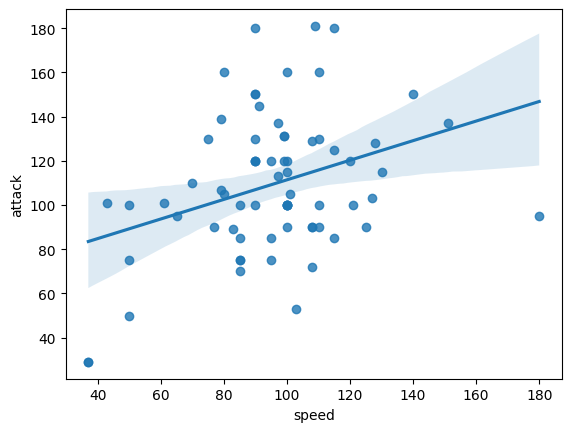

In [71]:
# lets figure out if the speed of a legendary pokemon has anything to do with its attack.
sns.regplot(x = 'speed', y = 'attack', data = legendary_pokemon) 
'''From the regression plot we were able to find out that even if a pokemon has a higher speed 
it might not have the highest attack as some other factor might also play a part in it '''

<AxesSubplot: xlabel='capture_rate', ylabel='base_happiness'>

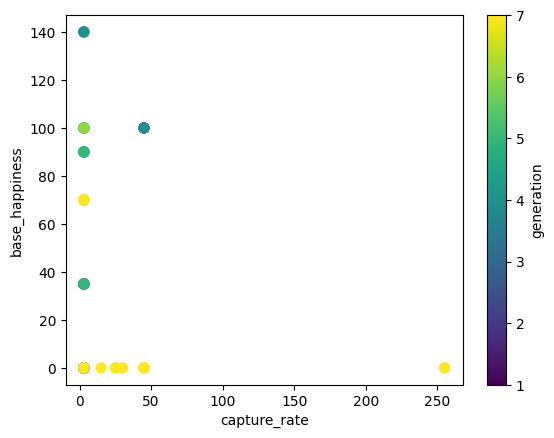

In [69]:
#Similarly does the base happiness of a legendary pokemon has anything to do with its capture rate?
#capture_rate = object data type
# this converts the object datatype to integer by first converting it to string then to an integer
legendary = legendary_pokemon.convert_dtypes()       #changed the capture_rate to string
legendary[['capture_rate']] =legendary[['capture_rate']].astype(int)
#legendary[['base_happiness']] =legendary[['base_happiness']].astype(int)
#legendary.dtypes

legendary.plot.scatter(x = 'capture_rate', y = 'base_happiness',c = 'generation',cmap = 'plasma', s=50)


<AxesSubplot: xlabel='capture_rate', ylabel='base_happiness'>

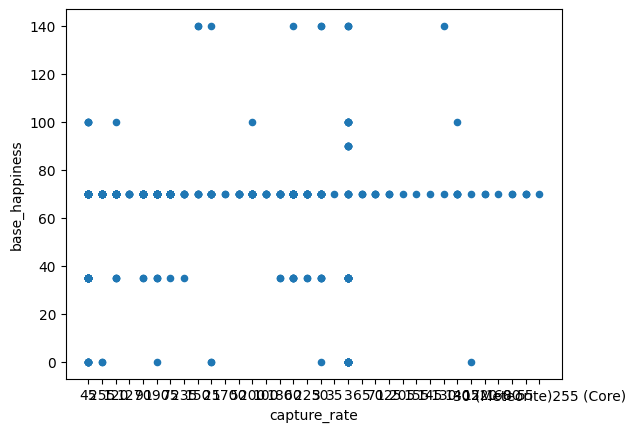